# importing libraries

In [45]:
#importing the variables from preprocessing
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r classes

In [6]:
# keras packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout

In [69]:
# model evaluation packages
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [51]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Building a ANN model with 1 Dense layer

In [7]:
#intializing CNN model
classifier = Sequential()

In [9]:
# add 1st hidden layer
classifier.add(Dense(input_dim = X_train.shape[1],
                    units = 256, kernel_initializer='uniform',
                    activation = 'relu'))

In [10]:
# add output laye
classifier.add(Dense(units=10, kernel_initializer='uniform',
                    activation='softmax'))

In [11]:
# compile the neural network
classifier.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [12]:
# model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Training an ANN model

In [16]:
# fit training dataset into the model
classifier_fit = classifier.fit(X_train, 
                                y_train, 
                                epochs=25, 
                                verbose=0)

# Evaluation of ANN model

In [22]:
# evaluation the model for testing dataset
test_loss = classifier.evaluate(X_test,y_test,verbose=0)

In [31]:
# prediction the model
y_pred = np.argmax(classifier.predict(X_test),axis=1)

313/313 [==============================] - 1s 2ms/step


In [76]:
# calculate f1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score: ",f1)

F1-score:  0.9779940843378359


In [37]:
# calculate accuraccy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9781


In [77]:
# calculate recall
recall = recall_score(y_test,y_pred,average='macro')
print("Recall: ",recall)

Recall:  0.9780659815689716


In [78]:
# calculate precision
precision = precision_score(y_test,y_pred,average='macro')
print("Precision: ",precision)

Precision:  0.9780240019956606


313/313 [==============================] - 1s 2ms/step


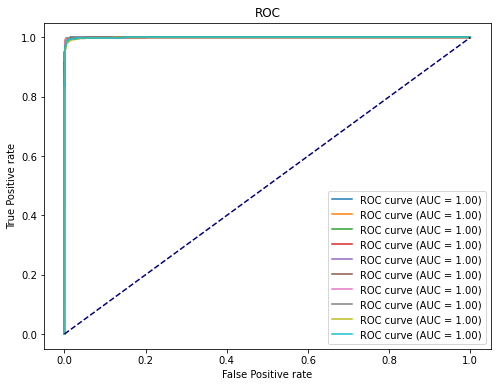

In [62]:
# calculate the roc

# convert the labels to one-hot encoded format
y_test_encoded = label_binarize(y_test,classes=classes)
# make predictions on the test datset
y_pred_prob = classifier.predict(X_test)

# compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:,i],y_pred_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

# plot the Roc curve for each class
plt.figure(figsize=(8,6))
for i in range(len(classes)):
    plt.plot(fpr[i],tpr[i], label='ROC curve (AUC = %0.2f)' % roc_auc[i])
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [70]:
# confusion matric
cm = confusion_matrix(y_test,y_pred)

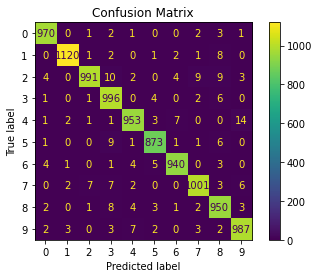

In [72]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= classes)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()